# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 4 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [90]:
%matplotlib inline
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import operator

---

## 2.4 PageRank

### 2.4.1 Random Surfer Model

#### Exercise 2.12

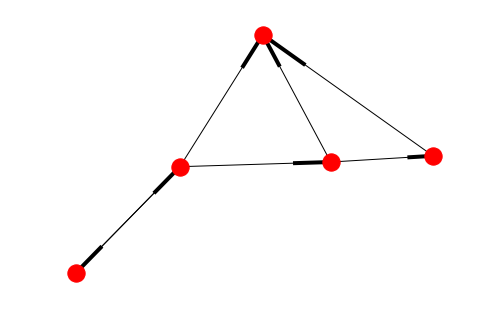

In [36]:
G1 = nx.read_adjlist("../data/absorbing.graph", nodetype=int, create_using=nx.DiGraph())
nx.draw(G1)

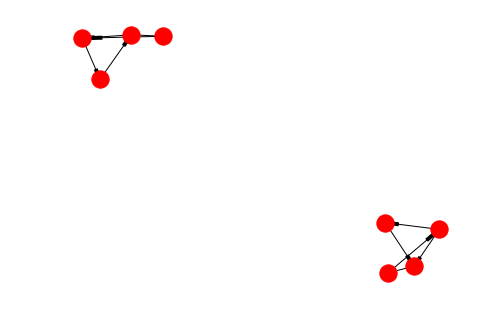

In [35]:
G2 = nx.read_adjlist("../data/components.graph", nodetype=int, create_using=nx.DiGraph())
nx.draw(G2)

In [102]:
ITERS = 1000

def random_surfer(G):
    n = random.choice(list(G.nodes()))
    counters = collections.defaultdict(lambda: 0)

    for i in range(ITERS):
        counters[n] += 1
        neighbors = list(G.neighbors(n))
        if len(neighbors) > 0:
            n = random.choice(neighbors)
        else:
            break
    
    counters = {k: v / ITERS for k, v in counters.items()}
    counters = sorted(counters.items(), key=operator.itemgetter(1))
    return counters

In [103]:
print(random_surfer(G1))
print(random_surfer(G2))

[(4, 0.001), (1, 0.001)]
[(5, 0.143), (6, 0.285), (7, 0.286), (4, 0.286)]


#### Exercise 2.13

In [104]:
ITERS = 1000
DAMP_FACT = 0.15

def random_surfer(G):
    n = random.choice(list(G.nodes()))
    counters = collections.defaultdict(lambda: 0)

    for i in range(ITERS):
        counters[n] += 1
        neighbors = list(G.neighbors(n))
        choose_from = list(G.nodes()) if random.random() < DAMP_FACT or len(neighbors) == 0 else neighbors
        n = random.choice(choose_from)
    
    counters = {k: v / ITERS for k, v in counters.items()}
    counters = sorted(counters.items(), key=operator.itemgetter(1))
    return counters

In [106]:
print(random_surfer(G1))
print(random_surfer(G2))

[(2, 0.143), (0, 0.148), (4, 0.151), (3, 0.21), (1, 0.348)]
[(5, 0.069), (3, 0.088), (6, 0.118), (7, 0.132), (4, 0.135), (1, 0.149), (0, 0.153), (2, 0.156)]


---

### 2.4.2 Power Iteration Method

#### Exercise 2.14: Power Iteration method

In [107]:
G3 = nx.read_adjlist("../data/wikipedia.graph", nodetype=int, create_using=nx.DiGraph())

In [112]:
ITERS = 1000
THETA = 0.15
N = len(G3)

w = 
pi = np.ones(N) / N

for i in range(ITERS):
    h = 
    hh = h + (1 / N) * (w * np.ones(N).T) 
    g = THETA * hh + (1 - THETA) * (np.ones((N, N)) / N)
    pi = pi.dot(g)

[ 0.00018051  0.00018051  0.00018051 ...,  0.00018051  0.00018051
  0.00018051]


ValueError: shapes (5540,) and (5,) not aligned: 5540 (dim 0) != 5 (dim 0)

---

### 2.4.3 Gaming the system *(Bonus)*

#### Exercise 2.15 *(Bonus)*